**IMPORT**

In [1]:
import pandas as pd
import json       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=None

In [3]:
# %load "function.py"

In [3]:
df=pd.read_pickle("autos_20190708.pkl")

In [5]:
df=pd.read_pickle("piece.pickle")

**EDA**

In [8]:
drop_list=df.columns[df.isnull().mean() > 0.20]

In [9]:
df.drop(drop_list, axis=1, inplace=True)

In [10]:
df.shape

(15919, 119)

In [11]:
#df.dropna(thresh=60, inplace=True)

In [12]:
df=df.dropna()

In [13]:
df.shape

(6575, 119)

In [14]:
df.head(4)

,co2_emission,displacement,make,model,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,body,body_color,gearing_type,inspection_new,price,short_description,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,first_registration,fuel,nr_of_doors,nr_of_seats,type,warranty,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres
0,99.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013.0,LR-062483,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,True,3.8,Sedans,Black,Automatic,1,15770,Sportback 1.4 TDI S-tronic Xenon Navi Klima,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2016-01-01,Diesel (Particulate Filter),5.0,5.0,Used,1,https://www.autoscout24.com//offers/audi-a1-sp...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,99.0,1598.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450.0,AM-95365,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,False,3.8,Sedans,Black,Automatic,0,14640,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2016-01-01,Diesel (Particulate Filter),4.0,4.0,Used,1,https://www.autoscout24.com//offers/audi-a1-sp...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,109.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,16200.0,C1626,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False,4.1,Sedans,Black,Automatic,1,16790,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2016-01-01,Diesel (Particulate F

**FUEL**

In [15]:
df.fuel.value_counts()

Diesel (Particulate Filter)                2391
Super 95                                   1872
Gasoline                                    915
Diesel                                      791
Regular/Benzine 91                          223
Super E10 95                                191
Super 95 (Particulate Filter)               112
Gasoline (Particulate Filter)                43
Regular/Benzine 91 (Particulate Filter)      26
Regular/Benzine E10 91                        5
Super E10 95 (Particulate Filter)             3
Liquid petroleum gas (LPG)                    1
Super Plus 98                                 1
Biogas                                        1
Name: fuel, dtype: int64

In [16]:
df.loc[(df['fuel']=='Diesel (Particulate Filter)'), 'fuel']='Diesel'
df.loc[((df['fuel']=='Super 95') | (df['fuel']=='Regular/Benzine 91')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Super E10 95') | (df['fuel']=='Super 95 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Gasoline (Particulate Filter)') | (df['fuel']=='Regular/Benzine 91 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Regular/Benzine E10 91') | (df['fuel']=='Super E10 95 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[(df['fuel']=='Super Plus 98'), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Biogas') | (df['fuel']=='Liquid petroleum gas (LPG)')), 'fuel']='Biogas/LPG'

In [17]:
df.fuel.value_counts()

Gasoline      3391
Diesel        3182
Biogas/LPG       2
Name: fuel, dtype: int64

In [18]:
df.fuel.nunique()

3

**PRICE**

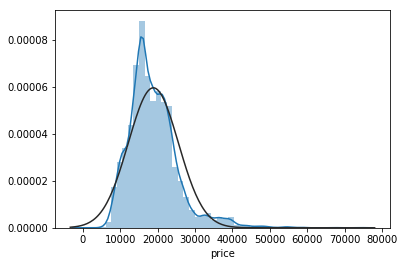

In [19]:
sns.distplot(df.price, fit=norm)

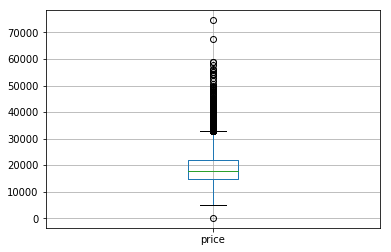

In [20]:
df.boxplot('price')

In [21]:
df.price.sort_values(ascending = True)[:5]

8828      120
8825     4990
13757    5900
13761    5900
13756    5938
Name: price, dtype: int64

In [22]:
df = df.drop([8828])

In [23]:
df.price.sort_values(ascending = True)[:5]

8825     4990
13757    5900
13761    5900
13756    5938
8601     5970
Name: price, dtype: int64

**DROP DOUBLE COLUMNS**

In [24]:
# age and firs registration columns are same
df.drop('first_registration', axis=1, inplace=True)

In [25]:
#body and body_type are same
df.drop(['body_type'], axis=1, inplace=True)

In [26]:
# Let's see if there are still "object" type columns to be converted to numeric
df.dtypes[df.dtypes == 'object']

make                 object
model                object
description          object
offer_number         object
body                 object
body_color           object
gearing_type         object
short_description    object
fuel                 object
type                 object
url                  object
dtype: object

In [27]:
df.describe(include = "object")

,make,model,description,offer_number,body,body_color,gearing_type,short_description,fuel,type,url
count,6574,6574,6574,6574,6574,6574,6574,6574,6574,6574,6574
unique,3,7,1,5956,9,12,3,4449,3,5,6574
top,Opel,A3,Sicherheit: Deaktivierung für Beifahrer-Airbag...,XJ38068,Sedans,Black,Automatic,SPB 1.6 TDI 116 CV S tronic Sport,Gasoline,Used,https://www.autoscout24.com//offers/opel-insig...
freq,2882,1434,6574,27,3131,1722,3645,35,3390,4613,1


In [28]:
# offer_number has many unique values.(5956). Let's drop it.
df.drop('offer_number', axis=1, inplace=True)

**HEAT MAP**

In [29]:
# designate columns_new that consist of numeric variables.
columns_new=["price", "co2_emission", "km", "consumption_comb",
              "age", "nr_of_doors", "warranty", "hp", "displacement",
        "nr_of_seats"]
df_new=df[columns_new]

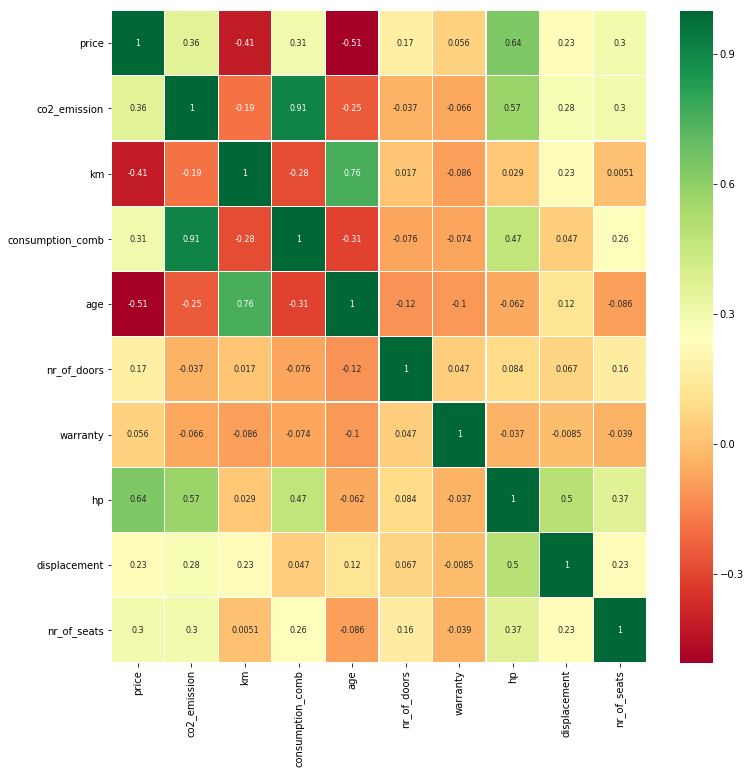

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':8})

**PAIR PLOT**

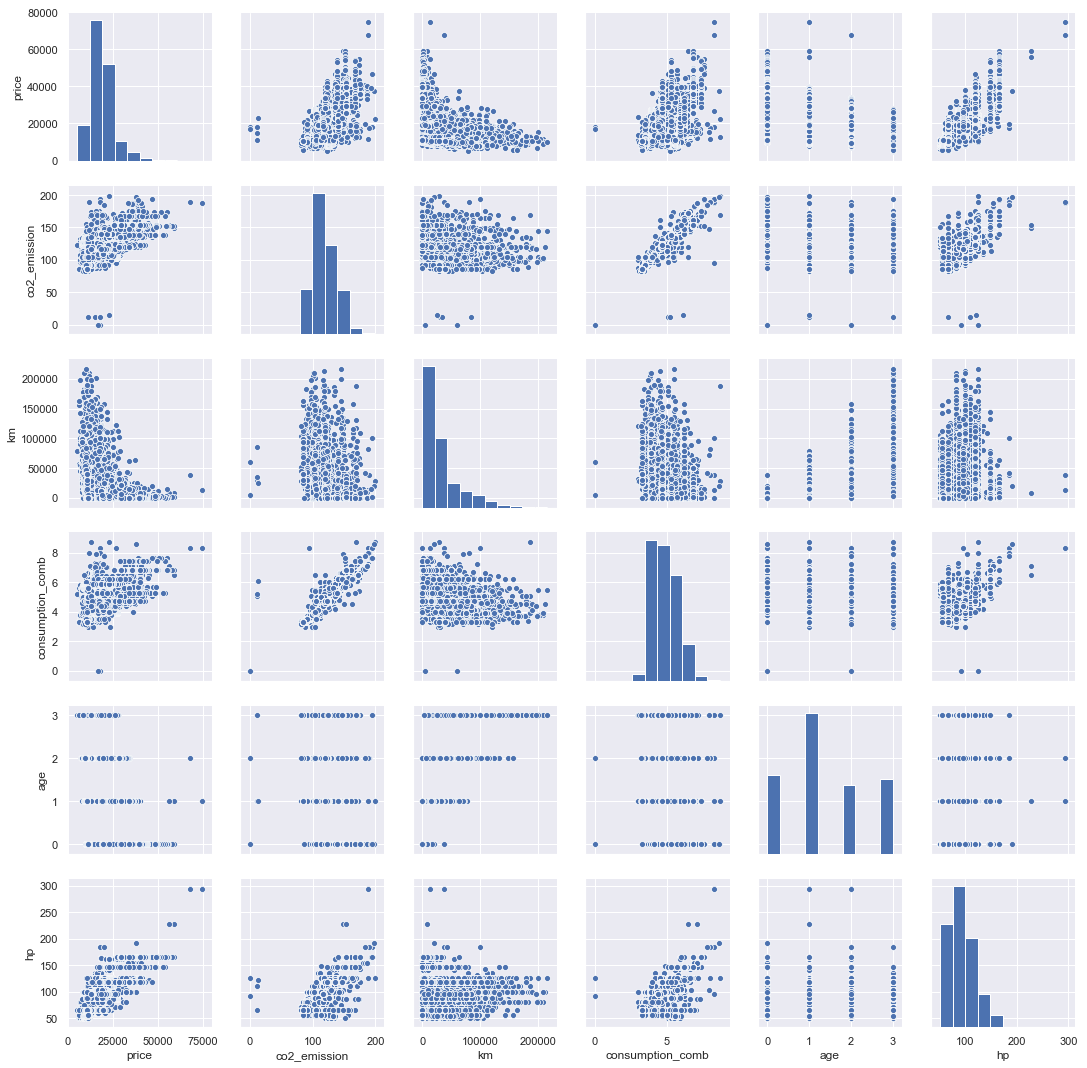

In [31]:
# aqcuire another list of columns called "cals" from important columns of columns_new. 
# And see the scatter plot of these columns.
sns.set()
cols=["price", "co2_emission", "km", "consumption_comb", "age", "hp"]
sns.pairplot(df[cols], size = 2.5)
plt.show()

**HP**

In [32]:
df.hp.describe()

count    6574.000000
mean       91.636447
std        25.591892
min        51.000000
25%        70.000000
50%        85.000000
75%       108.500000
max       294.000000
Name: hp, dtype: float64

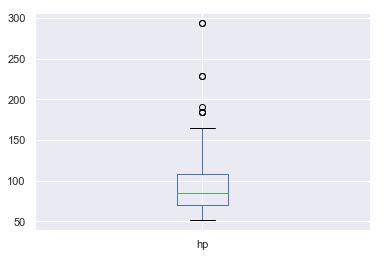

In [33]:
df.boxplot('hp')

**KM**

In [34]:
df.km.describe()

count      6574.000000
mean      30579.905689
std       33629.920986
min           1.000000
25%        5990.000000
50%       21205.000000
75%       40632.000000
max      216560.000000
Name: km, dtype: float64

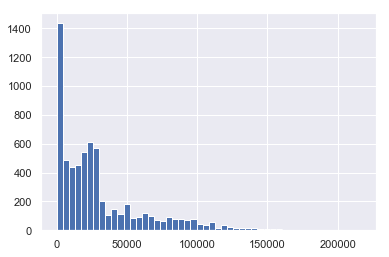

In [35]:
df['km'].hist(bins=50)

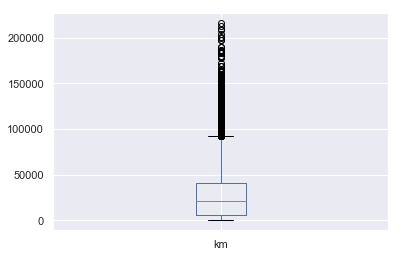

In [36]:
df.boxplot('km')

**AGE**

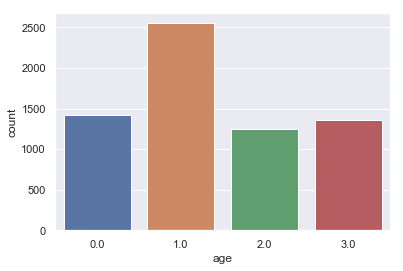

In [37]:
sns.countplot(df.age)

**CONSUMPTION_COMB**

In [38]:
df.consumption_comb.describe()

count    6574.000000
mean        4.845269
std         0.908443
min         0.000000
25%         4.100000
50%         4.700000
75%         5.500000
max         8.700000
Name: consumption_comb, dtype: float64

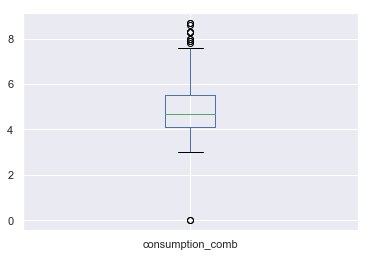

In [39]:
df.boxplot('consumption_comb')

**GEARING TYPE**

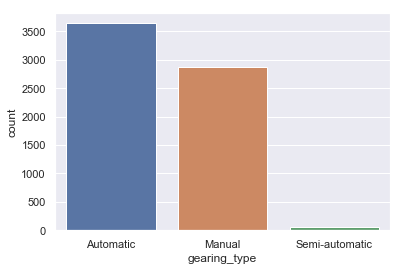

In [40]:
sns.countplot(df.gearing_type)

**MAKE**

In [41]:
df.make.value_counts(dropna=False)

Opel       2882
Audi       2756
Renault     936
Name: make, dtype: int64

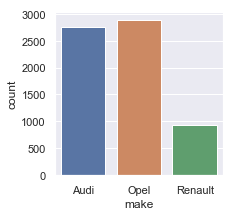

In [42]:
plt.figure(figsize=(3,3))
sns.countplot(df.make)

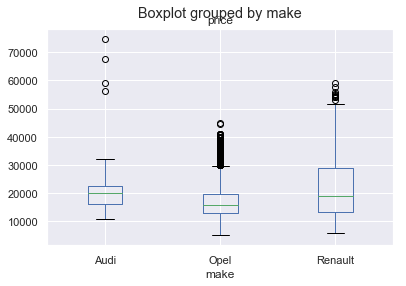

In [43]:
df.boxplot(column='price', by = 'make')

**MODEL**

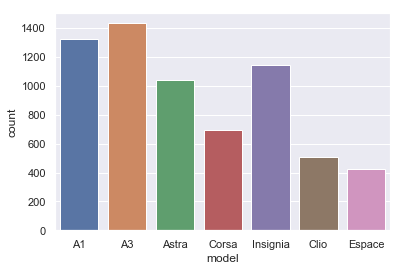

In [44]:
sns.countplot(df.model)

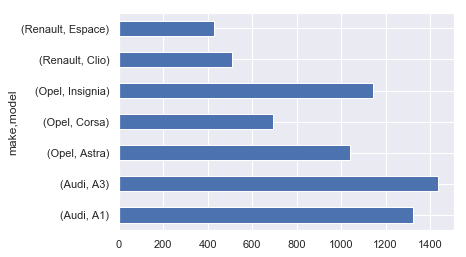

In [45]:
df.groupby(['make', 'model']).size().plot.barh()

**BODY**

In [46]:
df.body.value_counts(dropna=False)

Sedans           3131
Station wagon    1656
Compact          1374
Van               338
Other              47
Transporter        19
Coupe               5
Off-Road            2
Convertible         2
Name: body, dtype: int64

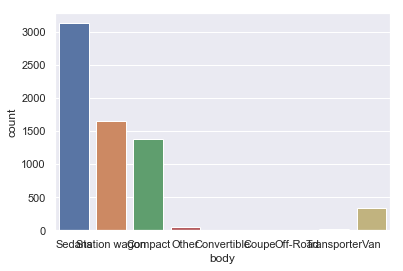

In [47]:
sns.countplot(df.body)

**BODY COLOR**

In [48]:
df.body_color.value_counts(dropna=False)

Black     1722
Grey      1528
White     1226
Silver     772
Blue       597
Red        449
Brown      132
Green       81
Beige       48
Yellow      17
Violet       1
Bronze       1
Name: body_color, dtype: int64

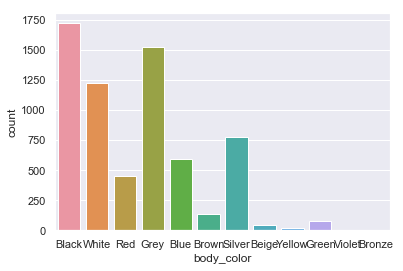

In [49]:
sns.countplot(df.body_color)

**NR_OF_DOORS**

In [50]:
df.nr_of_doors.unique()

array([5., 4., 3., 2.])

In [51]:
df.nr_of_doors.value_counts(dropna=False)

5.0    4511
4.0    1691
3.0     280
2.0      92
Name: nr_of_doors, dtype: int64

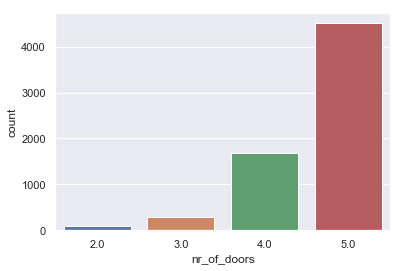

In [52]:
sns.countplot(df.nr_of_doors)

**NR_OF_SEATS**

In [53]:
df.nr_of_seats.unique()

array([5., 4., 3., 2., 7.])

In [54]:
df.nr_of_seats.value_counts(dropna=False)

5.0    5804
4.0     579
7.0     184
2.0       6
3.0       1
Name: nr_of_seats, dtype: int64

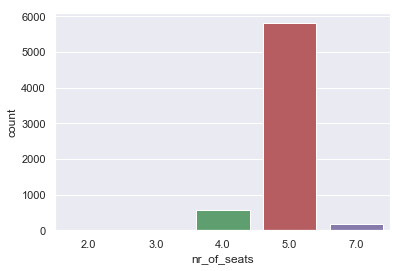

In [55]:
sns.countplot(df.nr_of_seats)

**TYPE**

In [56]:
df.type.unique()

array(['Used', "Employee's car", 'Demonstration', 'Pre-registered', 'New'],
      dtype=object)

In [57]:
df.type.value_counts(dropna=False)

Used              4613
Employee's car     757
Pre-registered     740
Demonstration      448
New                 16
Name: type, dtype: int64

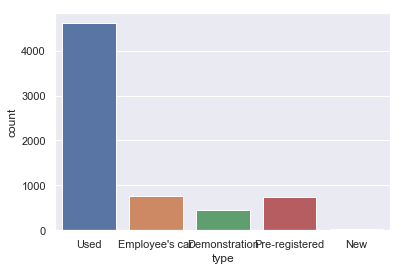

In [58]:
sns.countplot(df.type)

**DISPLACEMENT**

In [59]:
df.displacement.head()

0    1422.0
2    1598.0
4    1422.0
5    1598.0
6    1598.0
Name: displacement, dtype: float64

In [60]:
df.displacement.describe()

count     6574.000000
mean      1456.111196
std        328.454152
min        122.000000
25%       1364.000000
50%       1490.000000
75%       1598.000000
max      15898.000000
Name: displacement, dtype: float64

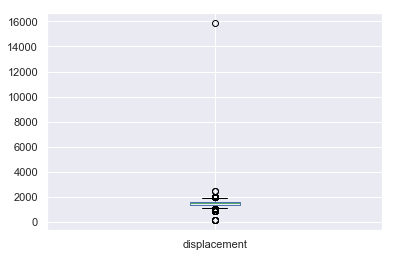

In [61]:
df.boxplot('displacement')

In [62]:
df.displacement[df.displacement>4000]

7169    15898.0
Name: displacement, dtype: float64

In [63]:
df = df.drop([7169])

In [64]:
df.displacement[df.displacement<800]

7809     139.0
7810     139.0
7811     139.0
7812     139.0
10194    122.0
Name: displacement, dtype: float64

In [65]:
df = df.drop([7809, 7810, 7811, 7812, 10194])

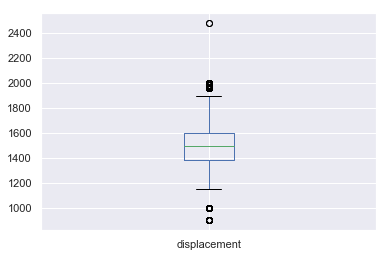

In [66]:
df.boxplot('displacement')

**NEXT_INSPECTION AND INSPECTION_NEW COLUMNS**

In [67]:
df.inspection_new.head()

0    1
2    0
4    1
5    0
6    1
Name: inspection_new, dtype: int64

**PROFILING**

In [68]:
import pandas_profiling

In [69]:
profile = pandas_profiling.ProfileReport(df)

In [96]:
profile.to_file(outputfile="outputfile.html")

In [154]:
#display(profile)

In [70]:
print(df['consumption_comb'].corr(df['co2_emission']))

0.9091843885265388


In [71]:
df.drop(['co2_emission'], axis=1, inplace=True)

In [72]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
description          object
body                 object
body_color           object
gearing_type         object
short_description    object
fuel                 object
type                 object
url                  object
dtype: object

In [73]:
df.drop(['description', 'short_description', 'url'], axis=1, inplace=True)

In [74]:
df= pd.get_dummies(df)

In [75]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

In [76]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,True,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,False,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,

In [77]:
df.drop(['next_inspection_bool'], axis=1, inplace=True)

In [78]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,

In [79]:
profile = pandas_profiling.ProfileReport(df)

In [109]:
profile.to_file(outputfile="outputfile.html")

In [80]:
# According to profiling we drop cc_leather_seats', 'ext_right_hand_drive columns.

In [81]:
df.drop(['cc_leather_seats', 'ext_right_hand_drive'], axis=1, inplace=True)

In [82]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.

In [83]:
df.shape

(6568, 144)

In [84]:
# Create a new column with sum of dummy values (total number of car attributes)
df['ss_sum'] = df.filter(like="ss_").sum(axis=1)
df['cc_sum'] = df.filter(like="cc_").sum(axis=1)
df['ext_sum'] = df.filter(like="ext_").sum(axis=1)
df['ent_sum'] = df.filter(like="ent_").sum(axis=1)

In [85]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,ss_sum,cc_sum,ext_sum,ent_sum
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,14.0,16.0,3.0,4.0
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,12.0,13.0,2.0,2.0
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,

In [86]:
df.ss_sum.head()

0    14.0
2    12.0
4    13.0
5    15.0
6    13.0
Name: ss_sum, dtype: float64

In [87]:
import statsmodels.formula.api as sm 

In [88]:
#let's make price column the last column.

In [89]:
df.shape

(6568, 148)

**MODEL**

In [90]:
X=df.drop(['price'], axis=1).values

In [91]:
X.shape

(6568, 147)

In [92]:
y=df['price'].values

In [93]:
y.shape

(6568,)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
print(reg.score(X_test,y_test))

0.9071381442881664


In [97]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=10)
accuraries

array([0.89779378, 0.90103604, 0.8936303 , 0.87714356, 0.9060078 ,
       0.89226164, 0.88432463, 0.88261258, 0.92307124, 0.89562229])

In [98]:
accuraries.mean()

0.8953503861997701

**OLS**

In [99]:
X=np.append(arr=np.ones((6568, 1)).astype(int), values=X, axis=1)

In [100]:
reg_OLS=sm.OLS(y, X).fit()

In [101]:
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     460.5
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        01:53:28   Log-Likelihood:                -59426.
No. Observations:                6568   AIC:                         1.191e+05
Df Residuals:                    6433   BIC:                         1.200e+05
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6611.7120    351.153     18.829      0.000    5923.336    7300.088
x1            -0.8684      0.299     -2.905      0.004      -1.454      -0.282
x2            83.9939      3.204     26.215      0.000      77.713      90.275
x3            -0.0349      0.001    -26.024      0.000      -0.037      -0.032
x4           645.6222    177.310      3.641      0.000     298.036     993.208
x5          -122.2542    124.207     -0.984      0.325    -365.742     121.233
x6           240.5859     98.724      2.437      0.015      47.054     434.118
x7           781.7778    121.253      6.447      0.000     544.081    1019.474
x8          -780.9175    135.729     -5.754      0.000   -1046.991    -514.844
x9          -233.2101    119.063     -1.959      0.050    -466.613       0.193
x10          428.6606    154.107      2.782      0.005     126.559     730.762
x11         -383.8994     88.563     -4.335      0.000    -557.512    -210.286
x12         -288.5402    170.453     -1.693      0.091    -622.685      45.604
x13           87.6696    214.129      0.409      0.682    -332.094     507.434
x14         -399.4829    139.865     -2.856      0.004    -673.664    -125.301
x15          291.0911     98.102      2.967      0.003      98.778     483.404
x16         -605.4087    101.332     -5.975      0.000    -804.053    -406.764
x17         -135.7800     69.881     -1.943      0.052    -272.770       1.210
x18          -87.9260    164.421     -0.535      0.593    -410.245     234.393
x19         -365.3061     83.849     -4.357      0.000    -529.679    -200.933
x20         -291.5229     96.887     -3.009      0.003    -481.454    -101.592
x21          -54.7346     76.490     -0.716      0.474    -204.681      95.212
x22          427.2415     88.990      4.801      0.000     252.792     601.691
x23          419.8204    107.961      3.889      0.000     208.182     631.459
x24         1614.2811    549.066      2.940      0.003     537.930    2690.632
x25         -144.0651    191.750     -0.751      0.452    -519.959     231.829
x26         -822.3267    141.220     -5.823      0.000   -1099.166    -545.488
x27          -88.5714    195.209     -0.454      0.650    -471.246     294.103
x28         -135.3280    142.338     -0.951      0.342    -414.357     143.702
x29          196.0889     87.861      2.232      0.026      23.851     368.326
x30          322.6959     86.370      3.736      0.000     153.381     492.011
x31         -102.1848    115.902     -0.882      0.378    -329.392     125.023
x32         -303.2838     83.801     -3.619      0.000    -467.562    -139.006
x33          182.4266     74.020      2.465      0.014      37.323     327.531
x34          -64.2164     66.292     -0.969      0.333    -194.170      65.737
x35        -1777.3134     48.676    -36.513      0.000   -1872.734   -1681.893
x3

In [102]:
list=[]
for i in reg_OLS.pvalues:
    if i <0.05:
      list.append(i)

In [103]:
len(list)

78

In [104]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [105]:
X_opt=backwardElimination(X, 0.05)

In [106]:
X_opt.shape

(6568, 87)

**X_opt MODEL**

In [107]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_opt, y, test_size=0.2, random_state=0)

In [108]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
print(reg.score(X_test2,y_test2))

0.9075735537651436


In [110]:
from sklearn.model_selection import cross_val_score
accuraries2 = cross_val_score(estimator=reg, X=X_train2, y=y_train2, cv=10)
accuraries2

array([0.89756334, 0.90203074, 0.89643047, 0.87749952, 0.90834963,
       0.89390252, 0.88487911, 0.88449596, 0.92438502, 0.89852546])

In [111]:
print(accuraries2.mean())

0.8968061777520685


**Backward Elimination**

In [112]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [113]:
X.shape

(6568, 148)

In [114]:
# There are 87 columns in optimum dataframe. One of them is constant value. So we will define 86 columns.

In [115]:
X=df.drop(['price'], axis=1)

In [116]:
y=df['price']

In [117]:
del list

In [118]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['displacement', 'hp', 'km', 'ss_abs', 'ss_alarm_system', 'ss_blind_spot_monitor', 'ss_central_door_lock', 'ss_central_door_lock_with_remote_control', 'ss_daytime_running_lights', 'ss_electronic_stability_control', 'ss_emergency_brake_assistant', 'ss_emergency_system', 'ss_fog_lights', 'ss_immobilizer', 'ss_isofix', 'ss_led_headlights', 'ss_lane_departure_warning_system', 'ss_night_view_assist', 'ss_power_steering', 'ss_traction_control', 'ss_xenon_headlights', 'consumption_comb', 'age', 'ent_media_cd_player', 'ent_media_digital_radio', 'ent_media_mp3', 'ent_media_radio', 'nr_of_doors', 'cc_armrest', 'cc_auxiliary_heating', 'cc_cruise_control', 'cc_heads_up_display', 'cc_keyless_central_door_lock', 'cc_lumbar_support', 'cc_massage_seats', 'cc_multi_function_steering_wheel', 'cc_panorama_roof', 'cc_park_distance_control', 'cc_parking_assist_system_camera', 'cc_parking_assist_system_self_steering', 'cc_parking_assist_system_sensors_rear', 'cc_power_windows', 'cc_rain_sensor', 'cc_seat_ve

In [119]:
len(cols)

86

**LASSO (alpha=3)**

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [121]:
#when alpha is 0, Lasso regression produces the same coefficients as a linear regression.
#When alpha is very very large, all coefficients are zero.

In [122]:
# Instantiate Lasso regressor
lasso = Lasso(alpha = 3, normalize = True)

# Fit the regressor
lasso.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.3f}".format(lasso.score(X_test, y_test)))

R^2: 0.878


In [123]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lasso, X_train, y_train, cv=5)

print("Average 5-Fold CV Score: {0:.3f}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.880


In [124]:
df_features = df.drop('price', axis = 1)

In [125]:
feature_coef = pd.DataFrame({'features' : df_features.columns, 'coef' : lasso.coef_})

In [126]:
significants = feature_coef.loc[feature_coef.coef != 0, :]
significants.shape
len(significants)

32

In [127]:
significants

,features,coef
1,hp,94.624198
2,km,-0.026442
6,ss_alarm_system,544.065110
10,ss_daytime_running_lights,-171.268025
15,ss_emergency_system,-92.973683
16,ss_fog_lights,-91.022074
19,ss_isofix,-43.802822
21,ss_led_headlights,297.969457
25,ss_power_steering,-289.848715
34,age,-1912.941511


**LASSO (alpha=1)**

In [128]:
# Instantiate Lasso regressor
lasso = Lasso(alpha = 1, normalize = True)

# Fit the regressor
lasso.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.3f}".format(lasso.score(X_test, y_test)))

R^2: 0.894


In [129]:
feature_coef = pd.DataFrame({'features' : df_features.columns, 'coef' : lasso.coef_})

In [130]:
significants = feature_coef.loc[feature_coef.coef != 0, :]
significants.shape
len(significants)

58

In [131]:
significants

,features,coef
1,hp,88.315363
2,km,-0.031440
6,ss_alarm_system,678.710596
10,ss_daytime_running_lights,-342.727369
13,ss_electronic_stability_control,-55.076782
14,ss_emergency_brake_assistant,126.403113
15,ss_emergency_system,-491.166968
16,ss_fog_lights,-267.599695
18,ss_immobilizer,-89.861803
19,ss_isofix,-198.008047
